<a href="https://colab.research.google.com/github/rezjaq/SVIP/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas Praktikum

In [49]:
from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
----------------------------
Masukkan Nilai Gamma  : 3


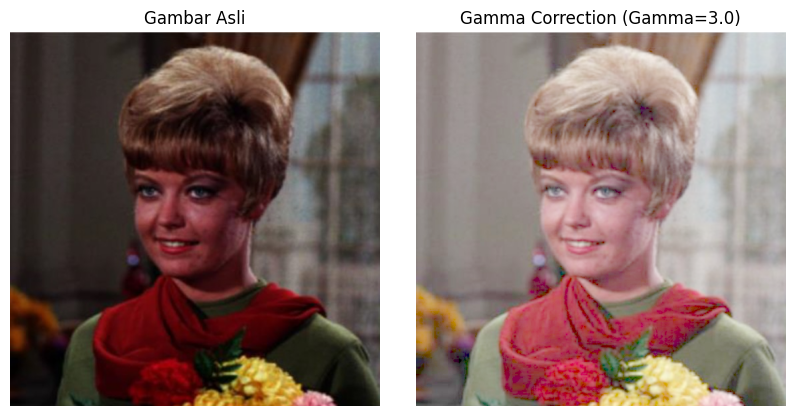

In [50]:
# Soal 1 Buat Gamma Correction sesuai dengan pentunjuk berikut
# Percobaan ini akan meminta anda membuat Gamma Correction.
# Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna.
# Berikut adalah kode untuk meminta masukan nilai dari pengguna.
# Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

print('Gamma Correction pada citra')
print('----------------------------')

try:
    gamma = float(input('Masukkan Nilai Gamma  : '))
except ValueError:
    print('Nilai Gamma harus berupa angka')

image = cv.imread('/content/drive/MyDrive/PCVK/gambar 1.jpg')

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

gamma_corrected = adjust_gamma(image, gamma)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_corrected, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (Gamma={gamma})')
plt.axis('off')
plt.subplots_adjust(wspace=0.1)
plt.show()




2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar

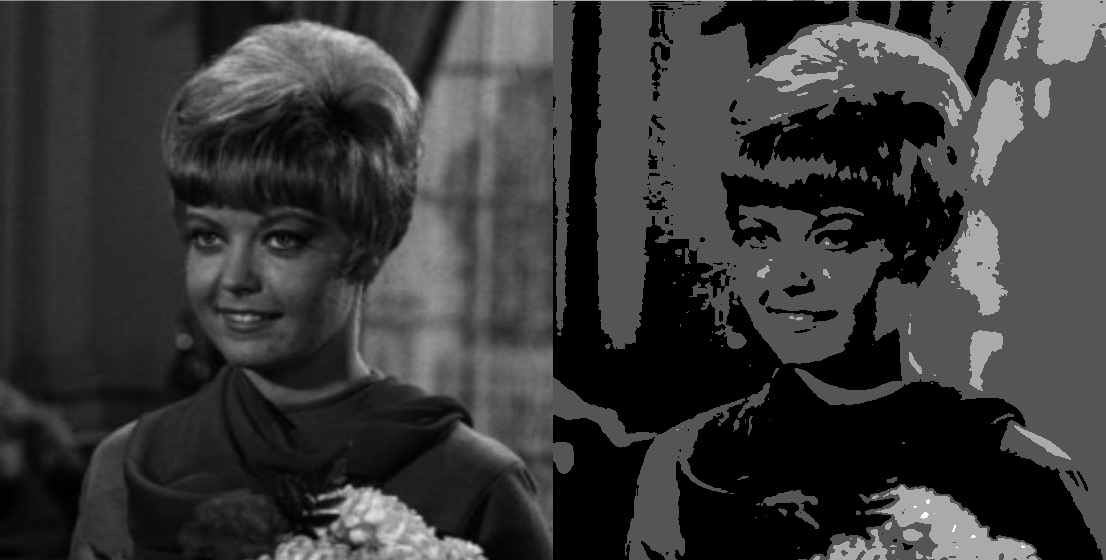

In [51]:
# Buat Simulasi Image Depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/PCVK/gambar 1.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = round(original[y, x] / level) * level

final_frame = cv.hconcat([original, depth_image])
cv2_imshow(final_frame)

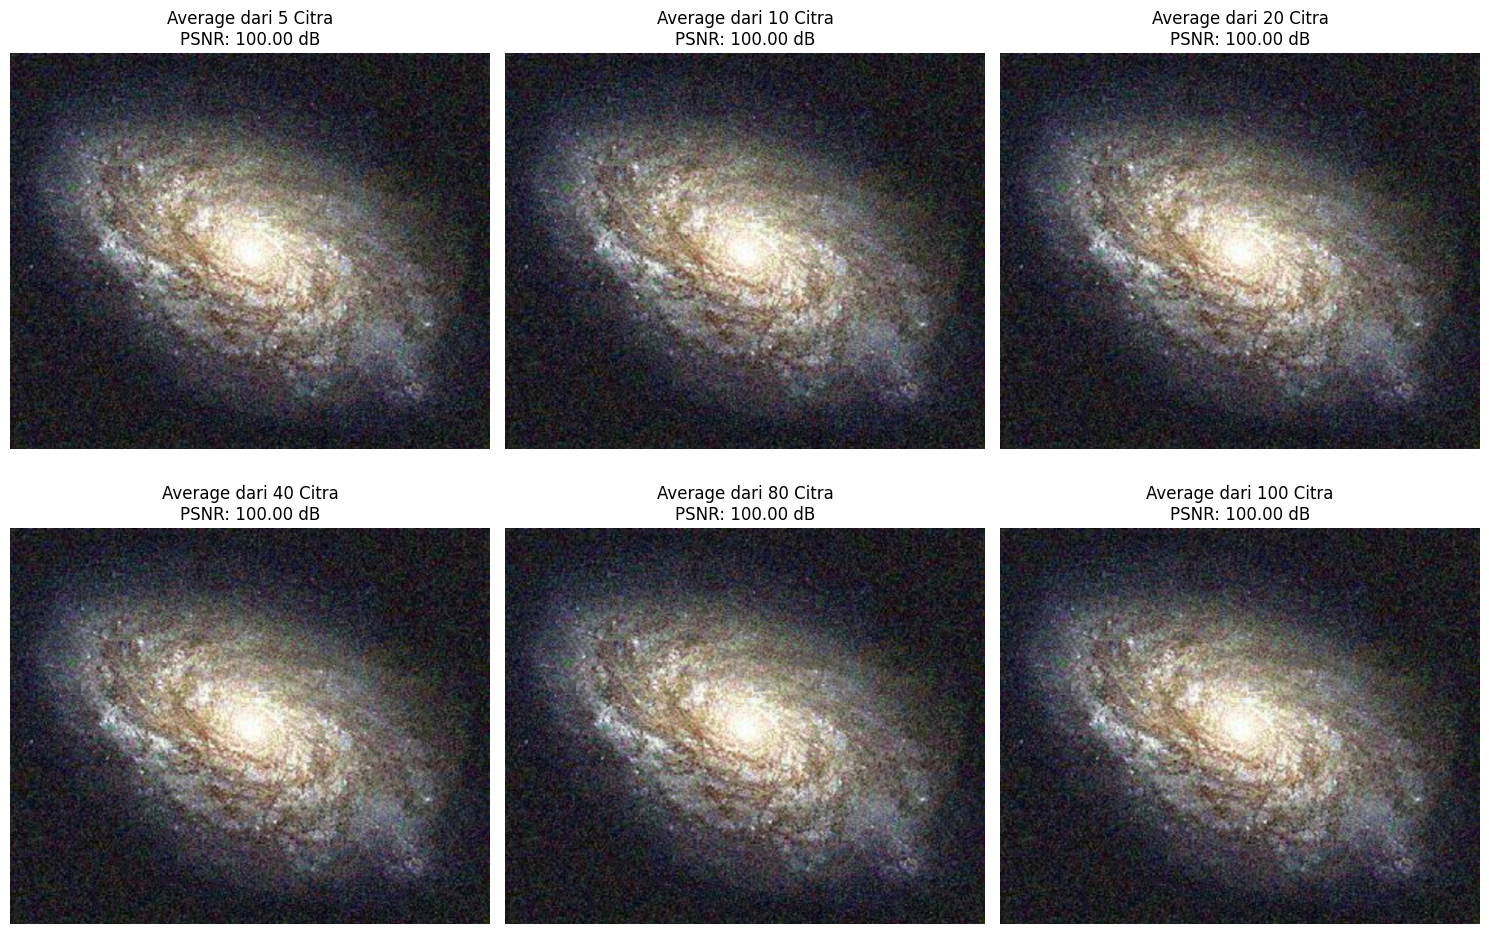

In [52]:
# Modul Average Denoising
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

if original_image is None:
    print("Gambar asli tidak ditemukan. Periksa jalur file.")
else:
    h, w, c = original_image.shape
    cv_img = [original_image] * 100

    psnr_values = []

    for i in [5, 10, 20, 40, 80, 100]:
        average_image = np.zeros((h, w, c), np.float32)
        for img in cv_img[:i]:
            average_image += img.astype(np.float32)

        average_image /= i
        average_image = np.clip(average_image, 0, 255)
        average_image = cv.convertScaleAbs(average_image)

        psnr_value = PSNR(original_image, average_image)
        psnr_values.append((i, average_image, psnr_value))

    num_plots = len(psnr_values)
    cols = 3
    rows = (num_plots + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(15, 10), tight_layout=True)
    axs = axs.flatten()

    for idx, (num_images, avg_img, psnr_val) in enumerate(psnr_values):
        axs[idx].imshow(cv.cvtColor(avg_img, cv.COLOR_BGR2RGB))
        axs[idx].set_title(f'Average dari {num_images} Citra\nPSNR: {psnr_val:.2f} dB')
        axs[idx].axis('off')

    for j in range(num_plots, len(axs)):
        axs[j].axis('off')

    plt.show()

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

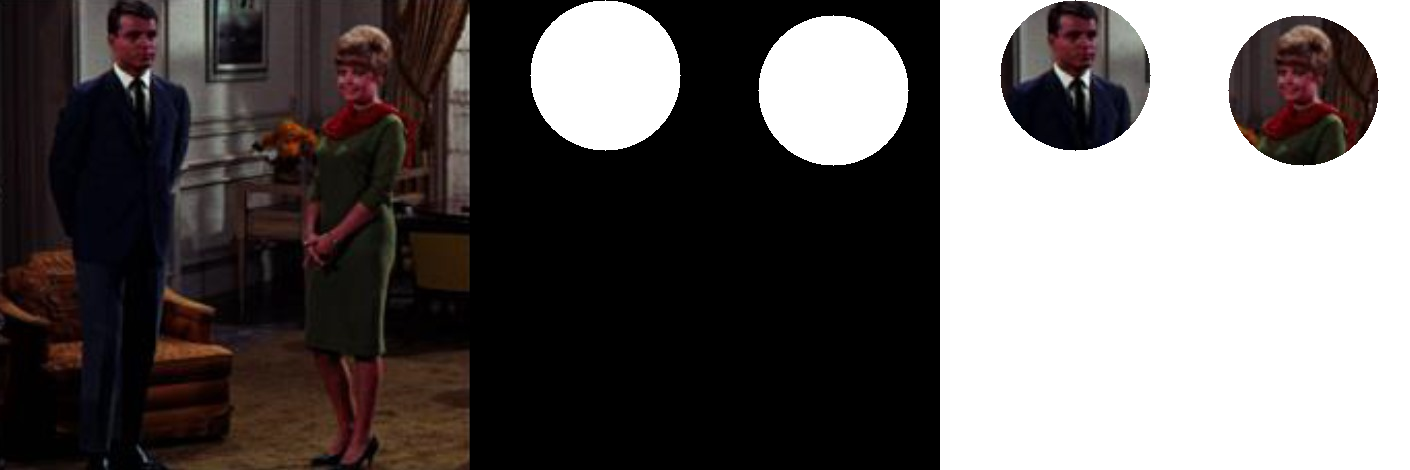

In [76]:
original_image = cv.imread('/content/drive/MyDrive/PCVK/two.jpg')
mask = np.zeros(original_image.shape, np.uint8)

cv.circle(mask, center=(135, 75), radius=75, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(363, 90), radius=75, color=(255, 255, 255), thickness=cv.FILLED)

masked = cv.bitwise_and(original_image, mask)
whitebg = np.full(original_image.shape, 255, dtype=np.uint8)
res = np.where(mask != 0, masked, whitebg)

final_frame = cv.hconcat([original_image, mask, res])

cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

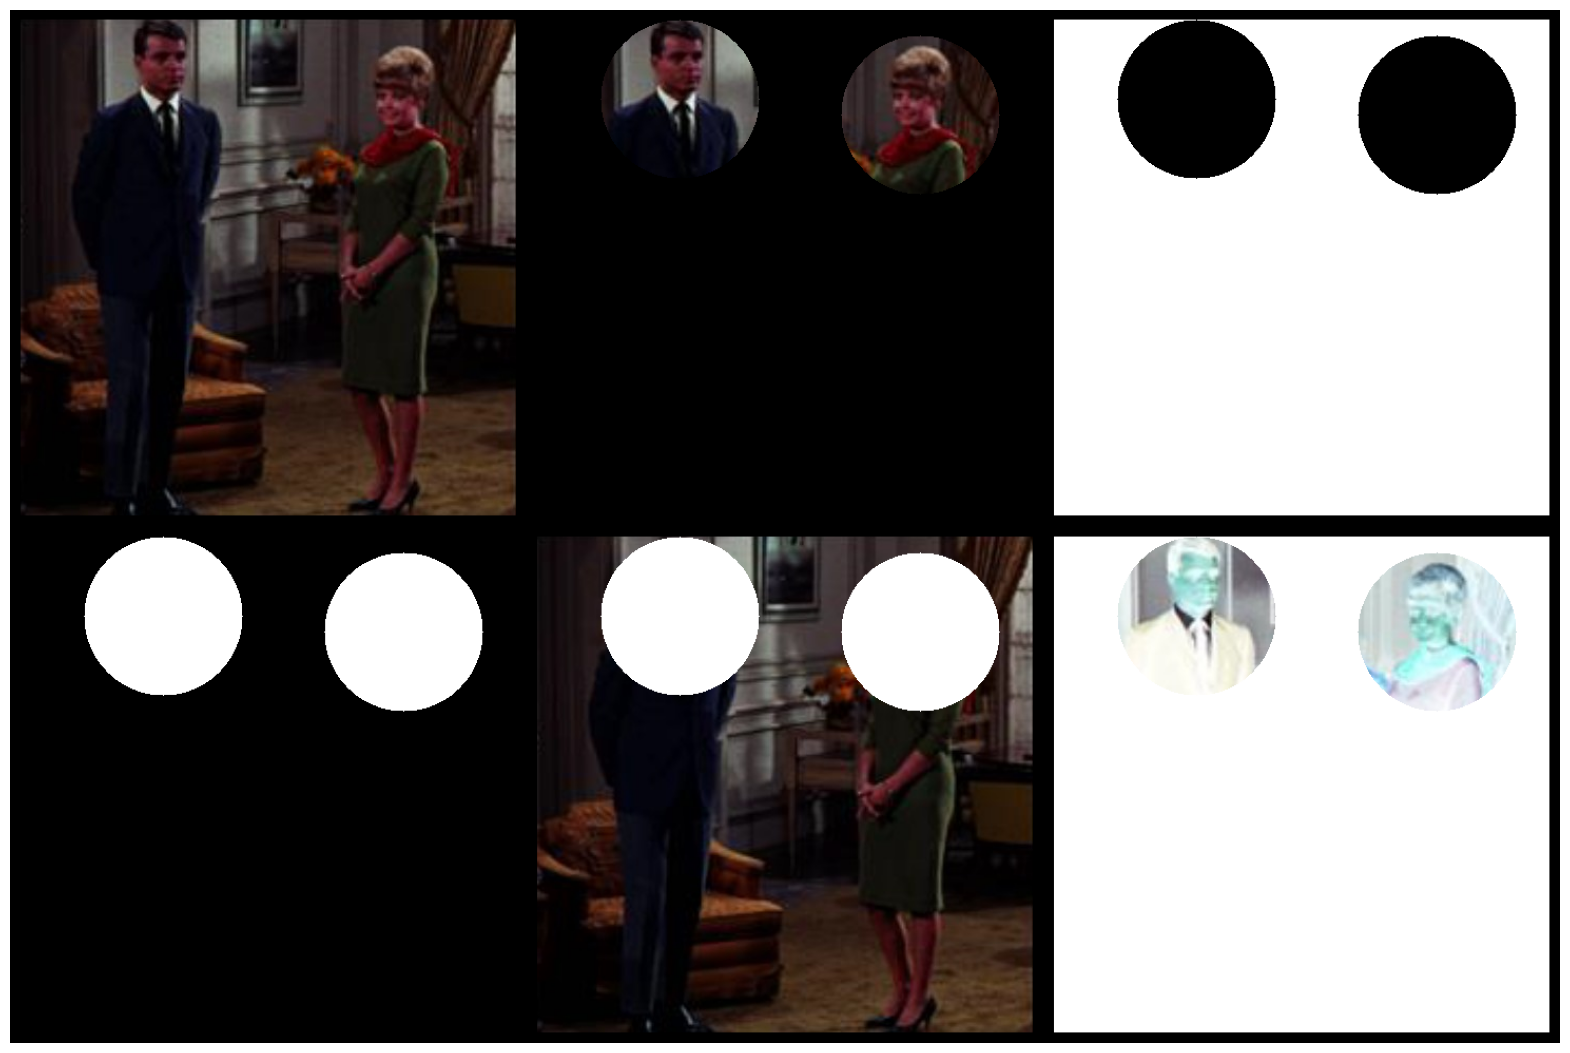

In [78]:
original_image = cv.imread('/content/drive/MyDrive/PCVK/two.jpg')

mask = np.zeros(original_image.shape, np.uint8)
cv.circle(mask, center=(135, 75), radius=75, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(363, 90), radius=75, color=(255, 255, 255), thickness=cv.FILLED)

# Operator Bitwise
bitwise_and = cv.bitwise_and(original_image, mask)
bitwise_or = cv.bitwise_or(original_image, mask)
bitwise_not = cv.bitwise_not(mask)
bitwise_nand = cv.bitwise_not(bitwise_and)
bitwise_xor = cv.bitwise_xor(original_image, mask)

# Fungsi untuk menambahkan border
def add_border(image, border_size, border_color):
    return cv.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv.BORDER_CONSTANT, value=border_color)

border_size = 10
border_color = [0, 0, 0]

original_image = add_border(original_image, border_size, border_color)
mask = add_border(mask, border_size, border_color)
bitwise_and = add_border(bitwise_and, border_size, border_color)
bitwise_or = add_border(bitwise_or, border_size, border_color)
bitwise_not = add_border(bitwise_not, border_size, border_color)
bitwise_nand = add_border(bitwise_nand, border_size, border_color)
bitwise_xor = add_border(bitwise_xor, border_size, border_color)

def resize_images_to_same_shape(*images):
    shapes = [img.shape[:2] for img in images]
    max_shape = np.max(shapes, axis=0)
    resized_images = [cv.resize(img, (max_shape[1], max_shape[0])) for img in images]
    return resized_images

resized_images = resize_images_to_same_shape(
    original_image, mask, bitwise_and, bitwise_or, bitwise_not, bitwise_nand, bitwise_xor
)

final_frame = np.hstack([
    np.vstack([resized_images[0], resized_images[1]]),
    np.vstack([resized_images[2], resized_images[3]]),
    np.vstack([resized_images[4], resized_images[5]])
])

plt.figure(figsize=(20, 15))
plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))
plt.show()